In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

import qopy.phase_space.wigner as wig
import qopy.phase_space.measures as meas
import qopy.phase_space.transforms as trans
import qopy.plotting as wplt
import qopy.utils.majorization as mjz

In [2]:
rl = 15
nr = 1000

w0 = wig.fock(0, rl, nr)
w1 = wig.fock(1, rl, nr)
w5 = wig.fock(5, rl, nr)

eta1 = 0.6
w0_resc_1 = trans.rescale(w0, np.sqrt(1-eta1))
w1_resc = trans.rescale(w1, np.sqrt(eta1))
w1_loss = trans.convolve(w1_resc, w0_resc_1, rl)

eta2 = 0.95
w0_resc_2 = trans.rescale(w0, np.sqrt(1-eta2))
w5_resc = trans.rescale(w5, np.sqrt(eta2))
w5_loss = trans.convolve(w5_resc, w0_resc_2, rl)

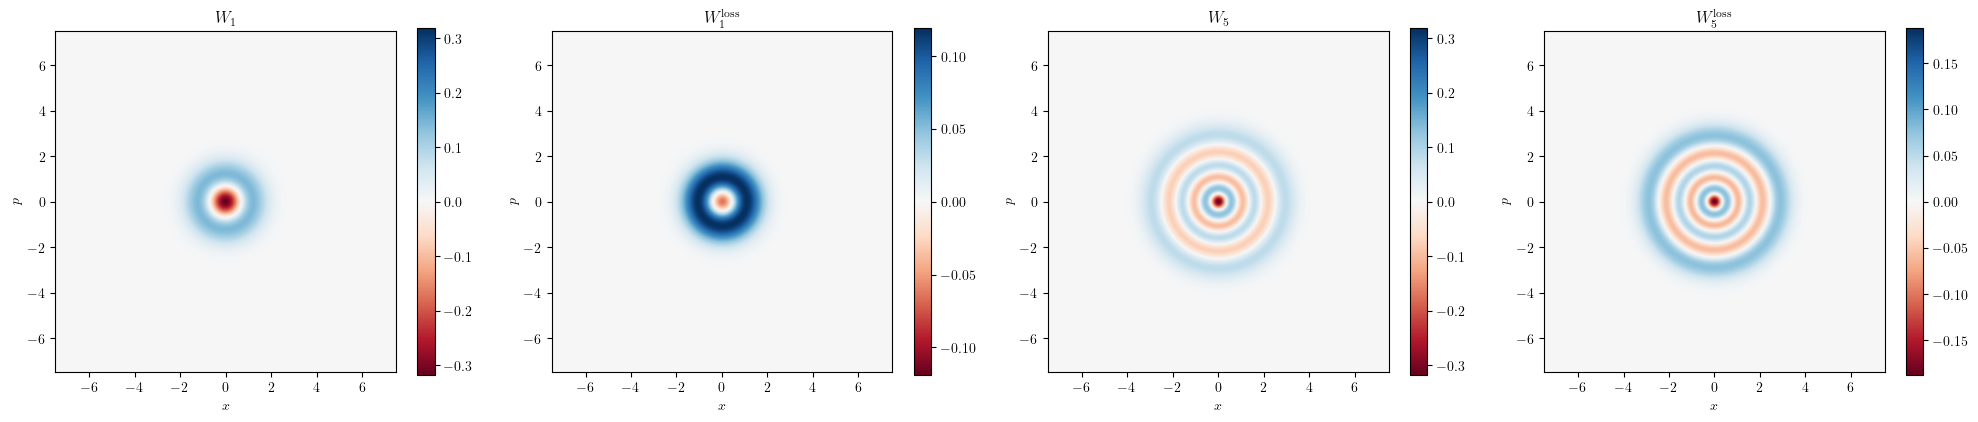

In [3]:
wplt.grid_2d([w1, w1_loss, w5, w5_loss], rl, titles=['$W_{1}$', '$W_{1}^{\\mathrm{loss}}$', '$W_{5}$', '$W_{5}^{\\mathrm{loss}}$'])


w1_loss
norm:  0.9999999999999991
purity:  0.5199999999998254
neg vol:  0.015779083039774256
---------------
w5_loss
norm:  0.9999999999999969
purity:  0.6406614221566255
neg vol:  0.46388740547362883


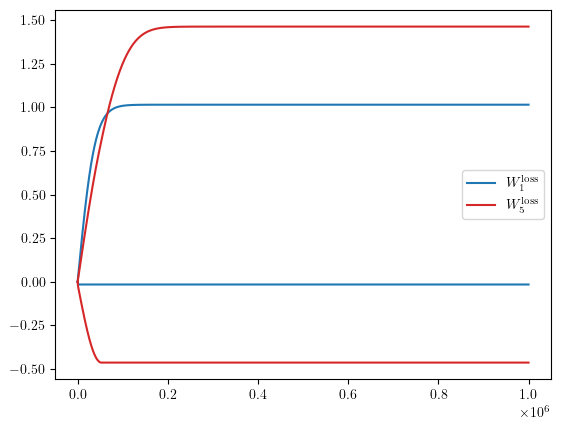

In [4]:
print('w1_loss')
print('norm: ', meas.integrate_2d(w1_loss, rl))
print('purity: ', meas.purity(w1_loss, rl))
print('neg vol: ', meas.negative_volume(w1_loss, rl))
print('---------------')
print('w5_loss')
print('norm: ', meas.integrate_2d(w5_loss, rl))
print('purity: ', meas.purity(w5_loss, rl))
print('neg vol: ', meas.negative_volume(w5_loss, rl))


lorenz_dec_w1_loss = mjz.lorenz_decreasing_2d(w1_loss, rl)
lorenz_inc_w1_loss = mjz.lorenz_increasing_2d(w1_loss, rl)
lorenz_dec_w5_loss = mjz.lorenz_decreasing_2d(w5_loss, rl)
lorenz_inc_w5_loss = mjz.lorenz_increasing_2d(w5_loss, rl)

plt.plot(lorenz_dec_w1_loss, label='$W_{1}^{\\mathrm{loss}}$', color='tab:blue')
plt.plot(lorenz_inc_w1_loss, color='tab:blue')
plt.plot(lorenz_dec_w5_loss, label='$W_{5}^{\\mathrm{loss}}$', color='tab:red')
plt.plot(lorenz_inc_w5_loss, color='tab:red')
plt.legend(loc='best')
plt.show()